In [23]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
import matplotlib.pyplot as plt

In [1]:
## Pseudocode RNN

state_t = 0

for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t
    
## More detailed pseudocode

state_t =0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t), dot(U, state_t) +b)

NameError: name 'input_sequence' is not defined

## RNN Block implementation in Numpy 

In [4]:
## Numpy implementation of Simple RNN
## Very vanilla and crisp explaination of Simple RNN

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t)+np.dot(U, state_t)+b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [10]:
final_output_sequence.reshape(6400,1)


array([[0.99999955],
       [0.99999966],
       [0.99999882],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

## Recurrent Layer in Keras

In [12]:
## Preparing the IMDB data

max_features = 10000
maxlen = 500
batxh_size = 32

print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [13]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequnces (samle x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
Pad sequnces (samle x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [21]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 733us/step - loss: 0.5808 - acc: 0.6828 - val_loss: 0.4483 - val_acc: 0.8114
Epoch 2/10
20000/20000 [==============================] - 13s 672us/step - loss: 0.3699 - acc: 0.8470 - val_loss: 0.3706 - val_acc: 0.8464
Epoch 3/10
20000/20000 [==============================] - 13s 670us/step - loss: 0.2755 - acc: 0.8939 - val_loss: 0.3331 - val_acc: 0.8668
Epoch 4/10
20000/20000 [==============================] - 14s 681us/step - loss: 0.2199 - acc: 0.9158 - val_loss: 0.6412 - val_acc: 0.7964
Epoch 5/10
20000/20000 [==============================] - 15s 732us/step - loss: 0.1768 - acc: 0.9361 - val_loss: 0.3775 - val_acc: 0.8570
Epoch 6/10
20000/20000 [==============================] - 14s 714us/step - loss: 0.1265 - acc: 0.9559 - val_loss: 0.5792 - val_acc: 0.8148
Epoch 7/10
20000/20000

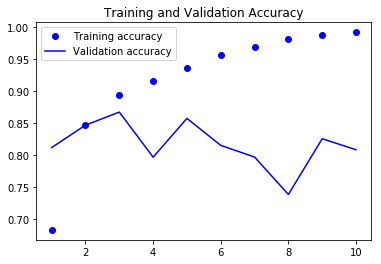

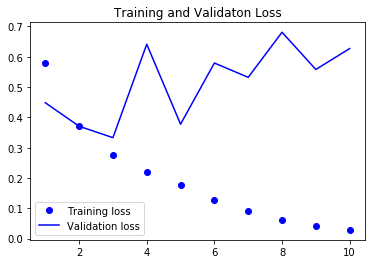

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validaton Loss')
plt.legend()
plt.show()